In [1]:
%matplotlib inline

In [2]:
from clawpack.geoclaw import dtopotools
import numpy as np

In [3]:
fault = dtopotools.SiftFault({'acszb2':1.})

In [4]:
lims = fault.containing_rect()

x0 = lims[0]-1.
x1 = lims[1]+1.

y0 = lims[2]-1.
y1 = lims[3]+1.

x = np.linspace(x0,x1,100)
y = np.linspace(y0,y1,100)
fault.subfaults[0].slip = -1.
dtopo0 = fault.create_dtopography(x,y,times=[0.])

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


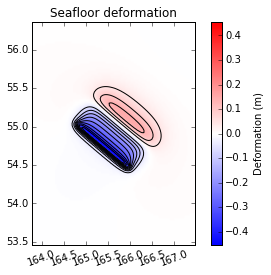

In [5]:
dtopo0.plot_dZ_colors(0.);

In [6]:
subfault0 = fault.subfaults[0]
subfault0.coordinate_specification

'noaa sift'

In [7]:
[subfault0.strike, subfault0.dip, subfault0.rake]

[310.17, 17.0, 90.0]

In [8]:
rect_corners = subfault0.corners

subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [rect_corners[0],rect_corners[1],rect_corners[2]]
subfault1.calculate_geometry_triangles()

subfault2 = dtopotools.SubFault()
subfault2.slip = 1.
subfault2.coordinate_specification = 'triangular'
subfault2._corners = [rect_corners[0],rect_corners[2],rect_corners[3]]
subfault2.calculate_geometry_triangles()

In [9]:
# rake = 162.5

subfault1.strike = subfault0.strike
subfault1.dip = subfault0.dip
subfault1.rake = subfault0.rake

subfault2.strike = subfault0.strike
subfault2.dip = subfault0.dip
subfault2.rake = subfault0.rake

print subfault1._get_unit_slip_vector()
print subfault2._get_unit_slip_vector()

[-0.61687172 -0.73074487  0.2923717 ]
[-0.61687172 -0.73074487  0.2923717 ]


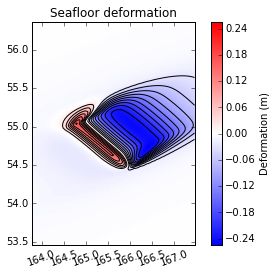

In [10]:
fault1 = dtopotools.Fault()

fault1.subfaults = []
fault1.subfaults.append(subfault1)
fault1.subfaults.append(subfault2)

dtopo1 = fault1.create_dtopography(x,y,times=[0.])
dtopo1.plot_dZ_colors(0.)

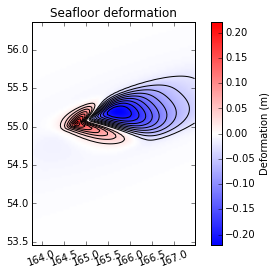

In [22]:
subfault1.corners

dtopo_tmp = subfault1.okada(x,y)
dtopo_tmp.plot_dZ_colors(0.)